In [1]:
# This notebook describe training new model from scratch using CNN from small dataset, for example Kaggles dogvscat
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import os, shutil

## Create Directory and copy files

In [7]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/nasirmac/Documents/deeplearning-dogvscat/kaggle_original_data'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/nasirmac/Documents/deeplearning-dogvscat/cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
# count how many pictures we have in each training split (train/validation/test)
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Building the network 

In [9]:
# build model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
# Compilation
# Problem type:Binary classification (eg.dogvscat),lastlayer activation=sigmoid,loss=binary_crossentropy
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data Preprocessing

In [12]:
# Preprocessing: read picture file, decode jpeg to rbg, convert into floating point tensor,rescale picture value (0,255) to (0,1)
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
# looking at the output of the generator
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
#fit the model to the data using the generator
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 124s 1s/step - loss: 0.6863 - acc: 0.5325 - val_loss: 0.6862 - val_acc: 0.5400
Epoch 2/30
100/100 [==============================] - 125s 1s/step - loss: 0.6461 - acc: 0.6170 - val_loss: 0.6837 - val_acc: 0.5790
Epoch 3/30
100/100 [==============================] - 125s 1s/step - loss: 0.5979 - acc: 0.6755 - val_loss: 0.6348 - val_acc: 0.6410
Epoch 4/30
100/100 [==============================] - 121s 1s/step - loss: 0.5605 - acc: 0.7080 - val_loss: 0.5997 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 123s 1s/step - loss: 0.5376 - acc: 0.7275 - val_loss: 0.5984 - val_acc: 0.6630
Epoch 6/30
100/100 [==============================] - 126s 1s/step - loss: 0.5200 - acc: 0.7375 - val_loss: 0.6083 - val_acc: 0.6680
Epoch 7/30
100/100 [==============================] - 126s 1s/step - loss: 0.4934 - acc: 0.7590 - val_loss: 0.6009 - val_acc: 0.6790
Epoch 8/30
100/100 [==============================] - 129s 1s/step - 

In [15]:
# save the model
model.save('cats_and_dogs_small_1.h5')

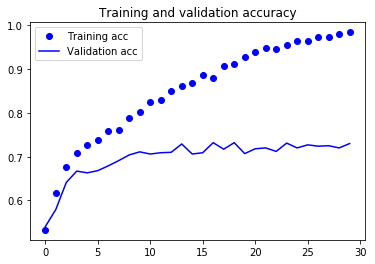

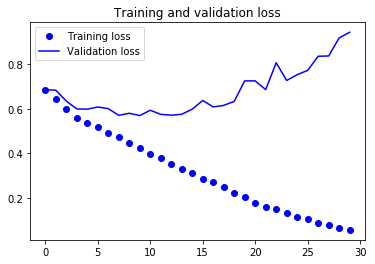

In [17]:
# plot the loss and accuracy of the model over the training and validation data during training
import matplotlib.pyplot as plt
%matplotlib inline  

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Data Augmentation 

In [18]:
# augmenting data 
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

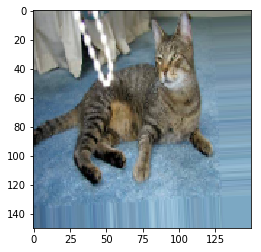

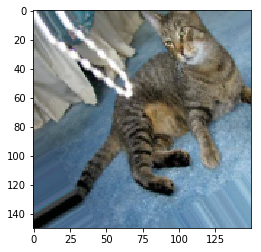

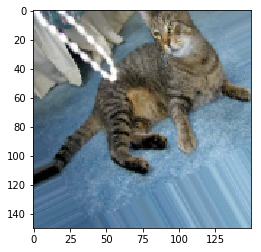

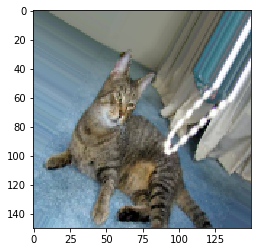

In [19]:
# Module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [20]:
# Avoid overfitting by adding dropout layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [21]:
## Training with augmented and added dropout layers
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 206s 2s/step - loss: 0.6938 - acc: 0.5134 - val_loss: 0.6888 - val_acc: 0.4987
Epoch 2/100
100/100 [==============================] - 190s 2s/step - loss: 0.6778 - acc: 0.5619 - val_loss: 0.6517 - val_acc: 0.6102
Epoch 3/100
100/100 [==============================] - 225s 2s/step - loss: 0.6663 - acc: 0.5937 - val_loss: 0.6459 - val_acc: 0.6225
Epoch 4/100
100/100 [==============================] - 211s 2s/step - loss: 0.6547 - acc: 0.6025 - val_loss: 0.6528 - val_acc: 0.6012
Epoch 5/100
100/100 [==============================] - 211s 2s/step - loss: 0.6374 - acc: 0.6322 - val_loss: 0.6707 - val_acc: 0.5558
Epoch 6/100
100/100 [==============================] - 194s 2s/step - loss: 0.6195 - acc: 0.6450 - val_loss: 0.6541 - val_acc: 0.6050
Epoch 7/100
100/100 [==============================] - 206s 2s/step - loss: 0.6026 - acc: 0.6672 - val_loss: 0.6

100/100 [==============================] - 186s 2s/step - loss: 0.4668 - acc: 0.7794 - val_loss: 0.4861 - val_acc: 0.7816
Epoch 62/100
100/100 [==============================] - 186s 2s/step - loss: 0.4775 - acc: 0.7706 - val_loss: 0.4599 - val_acc: 0.7735
Epoch 63/100
100/100 [==============================] - 186s 2s/step - loss: 0.4635 - acc: 0.7750 - val_loss: 0.4725 - val_acc: 0.7874
Epoch 64/100
100/100 [==============================] - 186s 2s/step - loss: 0.4664 - acc: 0.7869 - val_loss: 0.4510 - val_acc: 0.7899
Epoch 65/100
100/100 [==============================] - 192s 2s/step - loss: 0.4607 - acc: 0.7803 - val_loss: 0.4776 - val_acc: 0.7989
Epoch 66/100
100/100 [==============================] - 209s 2s/step - loss: 0.4579 - acc: 0.7881 - val_loss: 0.5269 - val_acc: 0.7648
Epoch 67/100
100/100 [==============================] - 190s 2s/step - loss: 0.4654 - acc: 0.7784 - val_loss: 0.4702 - val_acc: 0.7773
Epoch 68/100
100/100 [==============================] - 188s 2s/step

In [22]:
# save the model
model.save('cats_and_dogs_small_2.h5')

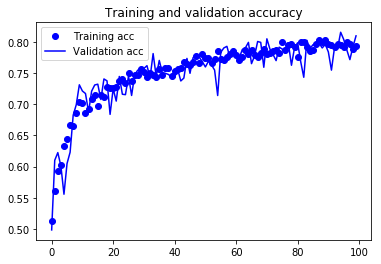

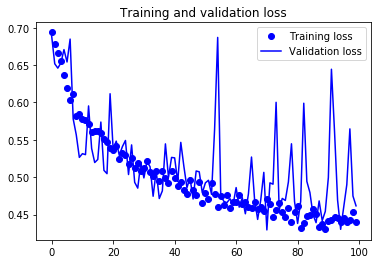

In [23]:
#plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()